# Introduction: Why show data?
Thank you for checking out the code for: 

> Hogan, Bernie (2022, forthcoming) _From Social Science to Data Science_. Sage Publications. 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://www.github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's forthcoming website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.09.VisualizingExpectations.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.09.VisualizingExpectations.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

/Users/berniehogan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

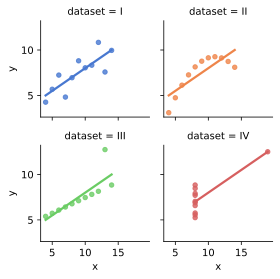

In [2]:
df = sns.load_dataset("anscombe")

fig = plt.figure()
fig.set_tight_layout(True)

# LM plot adds a regression trend line to a scatterplot
sns.lmplot(x="x", y="y", 
           col="dataset", hue="dataset", data=df,
           ci=None, height=2, col_wrap=2,
           palette="muted",
           scatter_kws={"s": 20})


plt.show()

# Ignore warning if you get: 
# UserWarning: The figure layout has changed to tight
#
# It is a known matplotlib issue: 
# https://github.com/mwaskom/seaborn/issues/3431

In [3]:
display(df.groupby('dataset')
        .agg(["mean","count","std","median"])
        .style.format("{:.3f}"))

# Visualising Distributions 

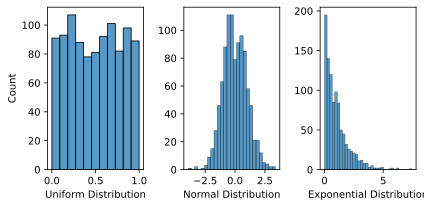

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(6,3))

plt1 = sns.histplot(np.random.uniform(size=1000),ax=ax1)
plt1.set_xlabel("Uniform Distribution")

plt2 = sns.histplot(np.random.normal(size=1000),ax=ax2)
plt2.set_xlabel("Normal Distribution")
plt2.set_ylabel("")

plt3 = sns.histplot(np.random.exponential(size=1000),ax=ax3)
plt3.set_xlabel("Exponential Distribution")
plt3.set_ylabel("")

plt.tight_layout()

plt.show()

## Uniform distribution with histogram

In [5]:
# Seed means that I should see the same random number sequence every time
# I use this random number generator. Different seed, different sequence.

rng = np.random.default_rng(seed=123456)
distribution = rng.integers(low=0, high=16, size=8000)

# Printing the distribution as a table first: 
import pandas as pd 

dist_table = pd.Series(distribution).value_counts() 
print(dist_table.sort_index())

0     507
1     516
2     482
3     511
4     524
5     508
6     462
7     488
8     520
9     506
10    514
11    489
12    480
13    500
14    494
15    499
Name: count, dtype: int64


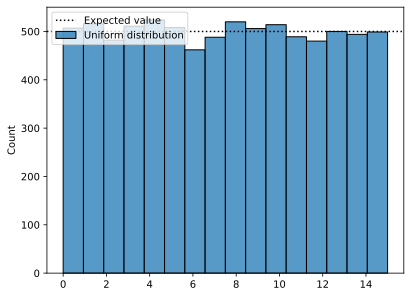

In [6]:
fig, ax = plt.subplots()

ax.axhline(500,
           linestyle=":", color='black',
           label="Expected value")

sns.histplot(distribution, bins=16,
             label="Uniform distribution")

ax.legend()

plt.show()

# Testing a uniform distribution using a Chi-Square test 

In [7]:
import scipy

In [8]:
chisq,pval = scipy.stats.chisquare(dist_table)

print(f"This time the distribution has a p-value of {pval:0.3f}")
print("The expected value is", dist_table.mean())

This time the distribution has a p-value of 0.910
The expected value is 500.0


In [9]:
dist_table.mean()

500.0

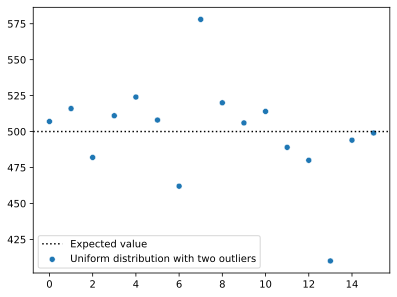

In [10]:
dist_2 = dist_table.copy()

dist_2.loc[7] += 90
dist_2.loc[13] -= 90

fig, ax = plt.subplots()

ax.axhline(500,
           linestyle=":", color='black',
           label="Expected value")

sns.scatterplot(x=dist_2.index, y=dist_2.values,
                label="Uniform distribution with two outliers")

ax.legend()

plt.show()

In [11]:
chisq,pval = scipy.stats.chisquare(dist_2)

print(f"This time the distribution has a p-value of {pval:0.3f}")
print("The expected value of the distribution is still", dist_table.mean())

This time the distribution has a p-value of 0.002
The expected value of the distribution is still 500.0


# Testing a uniform distribution using regression 

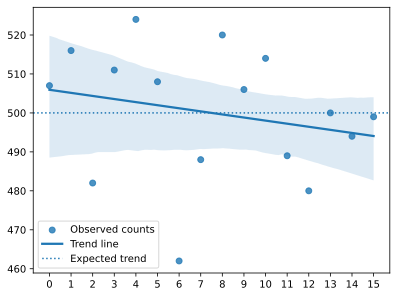

In [12]:
fig, ax = plt.subplots()

ax = sns.regplot(x = dist_table.index, y = dist_table.values,
                 line_kws={"label":"Trend line"},
                 label="Observed counts")

ax.axhline(500, linestyle=":", label="Expected trend")

ax.legend()

plt.xticks(range(0,16)) 

plt.show()

In [13]:
import statsmodels.api as sm

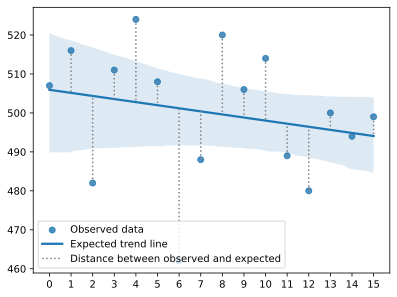

In [14]:
fig, ax = plt.subplots() 

X = [int(x) for x in dist_table.index]
y = dist_table.values

ax = sns.regplot(x=X, y=y, 
                 line_kws={"label":"Expected trend line"},
                 label="Observed data")


# New part: The regression model explicitly
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()

a = est.params[0]
b1 = est.params[1] 
pred = [a + (b1*i) for i in X]

# We use the predicted values from the regression to draw
# vertical lines from predicted Y (along the line) to observed Y.
ax.vlines(X, y, pred,
          linestyle=":", color="grey",
          label="Distance between observed and expected")

ax.legend()

plt.xticks(range(0,16))

plt.show()

In [15]:
conf_ints = est.conf_int()

print(f"When X = 0, Y is predicted to be {est.params[0]:0.1f}.")
print("When X is 0, 95% of the time Y is predicted to be between "
      f"{conf_ints[0][0]:0.1f} and {conf_ints[0][1]:0.1f}.",end="\n\n")

print("When X increases by 1 unit, Y is predicted to increase by", 
      f"{est.params[1]:0.1f}")
print("When X increases by 1 unit, 95% of the time Y is predicted to",
      f"increase by somewhere between {conf_ints[1][0]:0.1f} and "
      f"{conf_ints[1][1]:0.1f}.")

When X = 0, Y is predicted to be 505.9.
When X is 0, 95% of the time Y is predicted to be between 488.7 and 523.1.

When X increases by 1 unit, Y is predicted to increase by -0.8
When X increases by 1 unit, 95% of the time Y is predicted to increase by somewhere between -2.7 and 1.2.


In [16]:
est.pvalues

print(f"The pvalue for the constant 'a' is {est.pvalues[0]:0.3f}")
print(f"The pvalue for the coefficient 'b1' is {est.pvalues[1]:0.3f}")

The pvalue for the constant 'a' is 0.000
The pvalue for the coefficient 'b1' is 0.400


## Testing against a uniform distribution: Births in the UK 

In [17]:
from pathlib import Path 

In [18]:
birth_df = pd.read_csv(Path.cwd().parent / "data" / "average_birth_data.csv")

print("The average number of births per day was",
      f"{birth_df.average.mean():0.0f}\n")

The average number of births per day was 1813



In [19]:
display(birth_df.head())

,date,average
0,01-Jan,1573.50
1,02-Jan,1712.45
2,03-Jan,1795.25
3,04-Jan,1834.35
4,05-Jan,1824.35


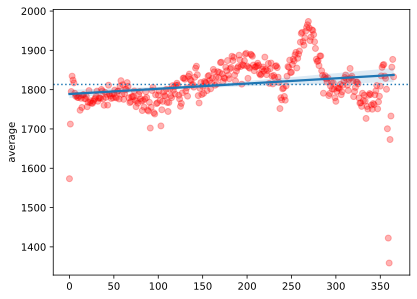

In [20]:
fig, ax = plt.subplots() 

sns.regplot(x=birth_df.index, y=birth_df.average,
            scatter_kws={"color":"red", "alpha":0.3})

ax.axhline(birth_df.average.mean(), linestyle=":")

plt.show()

In [21]:
X = birth_df.index
Y = birth_df["average"]
X2 = sm.add_constant(X)

est = sm.OLS(Y, X2).fit()
# print(est.summary()) # <- For the default Python output.

In [22]:
pip install stargazer

Note: you may need to restart the kernel to use updated packages.


In [23]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [24]:
stargazer = Stargazer([est])
stargazer.show_model_numbers(False)
stargazer.show_confidence_intervals(True)
stargazer.significant_digits(2)
HTML(stargazer.render_html()) # Book features stargazer.render_latex()

## Annotating a figure

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

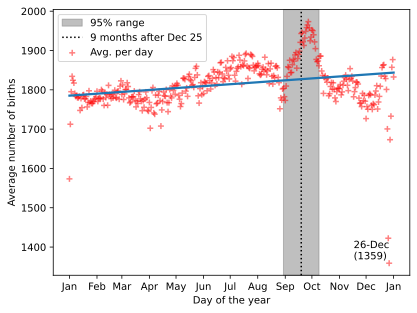

In [26]:
# I create 'ax' here first so we can layer some elements behind the plot
fig,ax = plt.subplots()

# Set the ticks to be on the months, Format the months using the DateFormatter 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add a vspan on the x-axis to 95% of births a full term after December 25
# Parameters for estimating births comes from Jukic et al., 
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3777570/
# They estimated among their sample a mean 268 days (sd 10). 
xmas = 359
mnbaby = 268
sdbaby = 10
yr = 366

ninemoslater = (xmas + mnbaby - yr)

# 2 Standard deviations above and below gets us 95% of births
# So 20 days before and after will display 95% of impact of a 
# particular day. In this case, Christmas Day.
bottomrange = ninemoslater-sdbaby*2
toprange = ninemoslater+sdbaby*2

ax.axvspan(bottomrange, toprange,
           color='grey',alpha=0.5, label="95% range")

ax.axvline(ninemoslater, linestyle=":", 
           color='black', label="9 months after Dec 25")

ax=sns.regplot(x=birth_df.index, y=birth_df.average,
               data=birth_df, robust=True, 
               marker="+", ci=None,
               scatter_kws={"color":"red", "alpha":0.5,},
               label="Avg. per day")

# Get the x,y coords of minumum (boxing day)
minday = birth_df[birth_df.average==min(birth_df.average)]

# Offset x by 40 and y by 10 so the label fits nicely in frame. 
# For the text I used a newline and some formatting for a round number
plt.text(x=minday.index[0]-40,
         y=minday.average.values[0]+10,
         s=f"{minday.date.values[0]}\n({minday.average.values[0]:.0f})")

ax.set(xlabel='Day of the year', ylabel='Average number of births')

ax.legend()

plt.show()

## Normal versus Skewed distributions as being interesting

# Comparing two distributions versus two groups

## Constraining our work based on our data

## Two continuous distributions. 

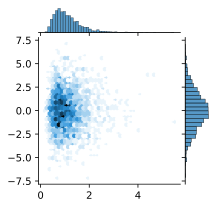

In [27]:
SIZE = 2000
np.random.seed(13)
dist1 = np.random.lognormal(0,.5,SIZE)
dist2 = np.random.normal(0,2,SIZE)

# sns.scatterplot(x = dist1, y=dist2)
sns.jointplot(x = dist1, y=dist2, height=3, kind="hex",)

plt.show()

In [28]:
from scipy import stats 

In [29]:
stats.pearsonr(dist1, dist2)

PearsonRResult(statistic=0.005908217497159611, pvalue=0.7917331952913101)

## PRE Scores 

### Real-world bivariate data that shows correlations and clusters

In [30]:
df = sns.load_dataset('iris')
df.columns = [x.replace("_","-") for x in df.columns]

display(df.sample(6,random_state=13))

,sepal-length,sepal-width,petal-length,petal-width,species
55,5.7,2.8,4.5,1.3,versicolor
64,5.6,2.9,3.6,1.3,versicolor
21,5.1,3.7,1.5,0.4,setosa
101,5.8,2.7,5.1,1.9,virginica
112,6.8,3.0,5.5,2.1,virginica
33,5.5,4.2,1.4,0.2,setosa


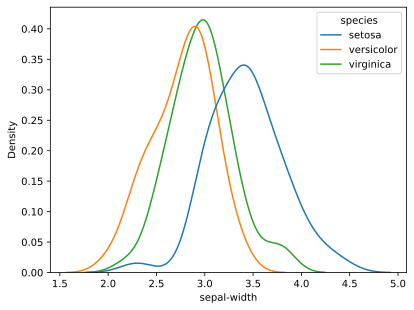

In [31]:
sns.kdeplot(x=df["sepal-width"], hue=df["species"])

plt.show()

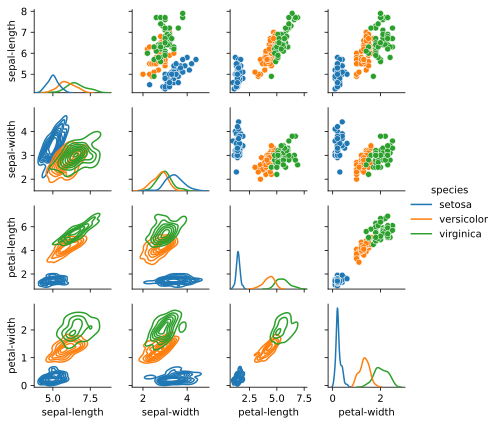

In [32]:
fig = sns.PairGrid(df, hue="species", height=1.5)

fig.map_upper(sns.scatterplot)
fig.map_diag(sns.kdeplot)
fig.map_lower(sns.kdeplot)
fig.add_legend()

plt.show()

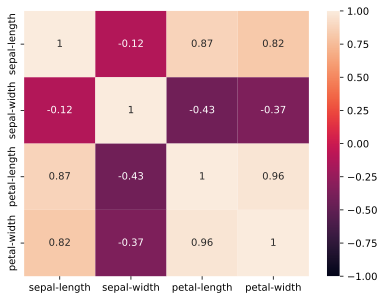

In [33]:
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1,annot=True)

plt.show()

In [34]:
tot_corr = stats.pearsonr(df["sepal-width"], df["petal-length"])

print(f"For all data combined:\t corr = {tot_corr[0]:.3f},",
      f"sig = {tot_corr[1]:.3f}")

for flower in df["species"].unique():
    corr = stats.pearsonr(df[df["species"]==flower]["sepal-width"],
                          df[df["species"]==flower]["petal-length"])

    print(f"For species {flower}:\t corr = {corr[0]:.3f},",
          f"sig = {corr[1]:.3f}")

For all data combined:	 corr = -0.428, sig = 0.000
For species setosa:	 corr = 0.178, sig = 0.217
For species versicolor:	 corr = 0.561, sig = 0.000
For species virginica:	 corr = 0.401, sig = 0.004


## Comparing distinct groups

In [35]:
stats.ttest_ind_from_stats(mean1=34.0, std1=20, nobs1=50,
                     mean2=28.0, std2=10, nobs2=20)

Ttest_indResult(statistic=1.2753736993876346, pvalue=0.20651699514080454)

### Analysis of variance

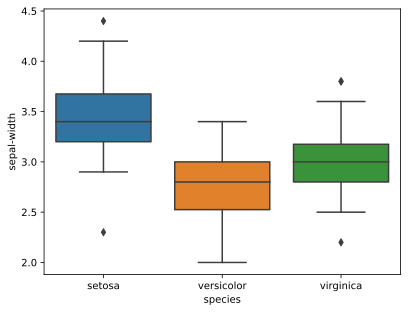

In [36]:
sns.boxplot(x=df["species"], y=df["sepal-width"])

plt.show()

In [37]:
x = df.groupby("species")["sepal-width"].apply(list)

stats.f_oneway(x["setosa"],x["versicolor"],x["virginica"])

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

## Summary 

# Further reading in visualisation

# Extensions and reflections 